### 1.collect the stock data
### 2 preprocess the data
### 3 train and test split (timestep logic)
### 4 create an stacked LSTM Model
### 5 predict the test data and plot the output
### 6 predict the future 30 days and plot the output.

In [1]:
### Data Collection
import pandas_datareader as pdr
key="2c39e65730d30280c6c8769a4c37841b50f7e723"

In [2]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

<ipython-input-2-08157bf6935e>:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('AAPL', api_key=key)


In [3]:
df.to_csv('AAPL.csv')

In [4]:
import pandas as pd

In [5]:
df=pd.read_csv('/content/AAPL.csv')

In [6]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2019-04-01 00:00:00+00:00,191.24,191.68,188.38,191.64,27861964,46.025197,46.131090,45.336888,46.121464,111447856,0.0,1.0
1,AAPL,2019-04-02 00:00:00+00:00,194.02,194.46,191.05,191.09,22765732,46.694252,46.800145,45.979470,45.989097,91062928,0.0,1.0
2,AAPL,2019-04-03 00:00:00+00:00,195.35,196.50,193.15,193.25,23271830,47.014339,47.291106,46.484871,46.508938,93087320,0.0,1.0
3,AAPL,2019-04-04 00:00:00+00:00,195.69,196.37,193.14,194.79,19114275,47.096166,47.259819,46.482464,46.879565,76457100,0.0,1.0
4,AAPL,2019-04-05 00:00:00+00:00,197.00,197.10,195.93,196.45,18526644,47.411440,47.435507,47.153926,47.279073,74106576,0.0,1.0


In [7]:
df.columns

Index(['symbol', 'date', 'close', 'high', 'low', 'open', 'volume', 'adjClose',
       'adjHigh', 'adjLow', 'adjOpen', 'adjVolume', 'divCash', 'splitFactor'],
      dtype='object')

In [8]:
df.isnull().sum().sum()

0

In [9]:
df1=df.reset_index()['close']

In [10]:
df1.head()

0    191.24
1    194.02
2    195.35
3    195.69
4    197.00
Name: close, dtype: float64

In [11]:
df1.tail()

1252    171.37
1253    172.28
1254    170.85
1255    169.71
1256    173.31
Name: close, dtype: float64

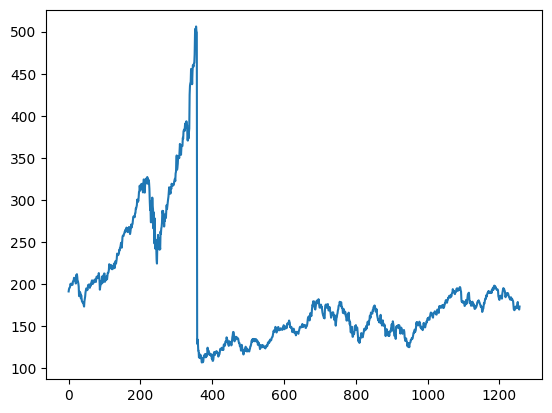

In [12]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [13]:
import numpy as np

In [14]:
df1

0       191.24
1       194.02
2       195.35
3       195.69
4       197.00
         ...  
1252    171.37
1253    172.28
1254    170.85
1255    169.71
1256    173.31
Name: close, Length: 1257, dtype: float64

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [16]:
print(df1)

[[0.21139637]
 [0.21835942]
 [0.22169067]
 ...
 [0.16032561]
 [0.15747026]
 [0.16648716]]


In [17]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [22]:
len(train_data),len(test_data)

(817, 440)

In [20]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [23]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [24]:
len(X_train),len(y_train),len(X_test),len(ytest)

(716, 716, 339, 339)

In [26]:
print(X_train.shape)

(716, 100)


In [28]:
print(y_train.shape)

(716,)


In [29]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [30]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [31]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [32]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 9s 143ms/step - loss: 0.0329 - val_loss: 0.0011
Epoch 2/100
12/12 [==============================] - 0s 20ms/step - loss: 0.0145 - val_loss: 0.0026
Epoch 3/100
12/12 [==============================] - 0s 19ms/step - loss: 0.0115 - val_loss: 5.4624e-04
Epoch 4/100
12/12 [==============================] - 0s 19ms/step - loss: 0.0098 - val_loss: 3.6844e-04
Epoch 5/100
12/12 [==============================] - 0s 20ms/step - loss: 0.0086 - val_loss: 0.0011
Epoch 6/100
12/12 [==============================] - 0s 18ms/step - loss: 0.0076 - val_loss: 4.5647e-04
Epoch 7/100
12/12 [==============================] - 0s 19ms/step - loss: 0.0067 - val_loss: 0.0010
Epoch 8/100
12/12 [==============================] - 0s 19ms/step - loss: 0.0061 - val_loss: 6.8180e-04
Epoch 9/100
12/12 [==============================] - 0s 19ms/step - loss: 0.0055 - val_loss: 0.0012
Epoch 10/100
12/12 [==============================] - 0s 20ms/step - loss: 0.0052 -

In [36]:
import tensorflow as tf

In [37]:
tf.__version__

'2.15.0'

In [38]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 6ms/step


In [39]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [40]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

220.21777327071345

In [41]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

173.37122030515306

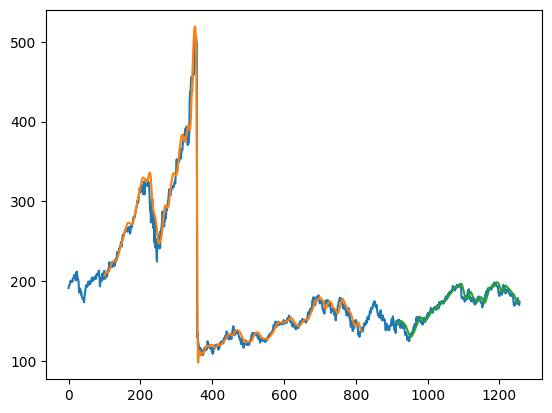

In [42]:
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [43]:
len(test_data)

440

In [49]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [50]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [51]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.16936351]
101
1 day input [0.17485285 0.18131497 0.18780213 0.19048215 0.1892799  0.19927364
 0.19526612 0.20187852 0.2033062  0.20756418 0.20751409 0.21192235
 0.20989355 0.2115717  0.2082154  0.20776456 0.20929242 0.20671259
 0.20816531 0.21139637 0.20686287 0.21685661 0.21410144 0.2189856
 0.22259236 0.21625548 0.22008766 0.22822793 0.22860363 0.2272511
 0.22304321 0.22567314 0.22038823 0.22001252 0.21730745 0.21592987
 0.21618034 0.21725736 0.21462743 0.19737007 0.19388854 0.18802755
 0.18619912 0.19716969 0.19611772 0.19874765 0.19724483 0.19807138
 0.19233563 0.18995617 0.20485911 0.21219787 0.21803381 0.22126487
 0.21956168 0.21873513 0.21435191 0.21262367 0.20338134 0.19426425
 0.2004258  0.19789606 0.20247965 0.20653726 0.20681277 0.20408265
 0.20541014 0.20115216 0.19586725 0.19363807 0.19291171 0.18902943
 0.18715091 0.18905448 0.1941891  0.18955542 0.18614903 0.18983093
 0.18680025 0.1851221  0.18239198 0.17097057 0.15849718 0.15599249
 0.15569192 0.16002505 0.16508453 0

In [52]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [53]:
import matplotlib.pyplot as plt

In [54]:
len(df1)

1257

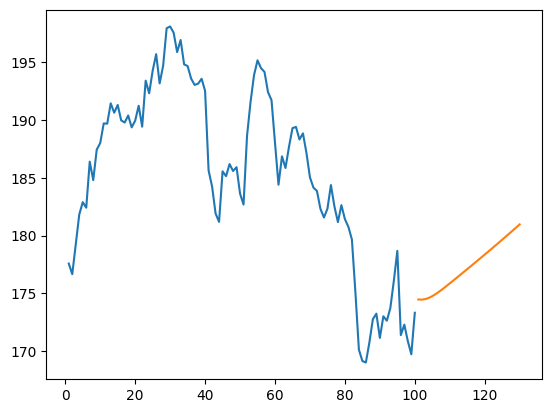

In [56]:
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

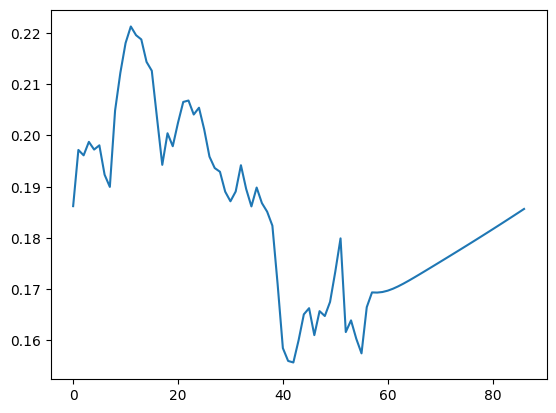

In [57]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [58]:
df3=scaler.inverse_transform(df3).tolist()

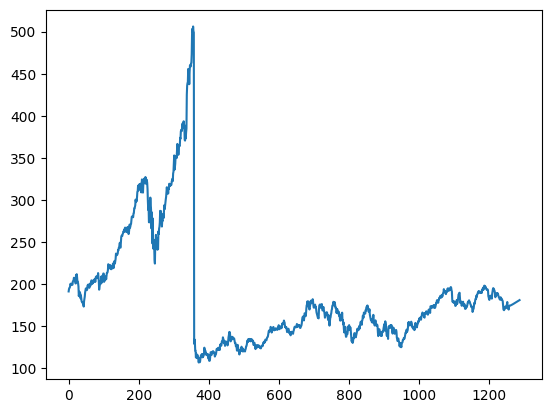

In [59]:
plt.plot(df3)